<a href="https://colab.research.google.com/github/vaishnavi-1/Electricity-theft-detection-using-ML/blob/main/keras_tuner_ETD_CNN_80_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [ ]:
!ls

drive  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Normalised Dataset

In [ ]:

df = pd.read_csv('/content/drive/My Drive/Normalised_data_final.csv')

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,OutPut
0,0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.409472,0.695609,0.312449,1.000000,0.742065,1.000000,0.770844,0.733432,0.613386,1
1,1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.413151,0.487179,0.768817,1.000000,0.767990,0.603391,0.530190,0.801075,0.658395,1
4,4,0.185469,0.218726,0.243668,0.292914,0.22768,0.271809,0.246866,0.225761,0.218086,...,0.663213,0.979790,0.864032,0.782169,0.938859,1.000000,1.000000,1.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,33836,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.491644,0.406141,0.627672,0.542169,0.524679,0.551885,0.596580,0.460552,0.472211,0
33837,33837,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.892625,0.563600,0.467590,0.687114,0.442161,0.400125,0.381961,0.361202,0.408947,0
33838,33838,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.853460,0.593995,0.673956,0.742493,0.553198,0.515666,0.657637,0.574413,0.793081,0
33839,33839,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [ ]:
y = df['OutPut']
count =0
for i in y:
  if(i==1):
    count = count+1
print("No of 1:",count)
print("Total No of Customers:",len(y))

No of 1: 3615
Total No of Customers: 33841


In [ ]:
data = df[100:110]
data.drop(['Unnamed: 0'],axis =1,inplace=True)
print(data)

            0         1         2         3         4         5         6  \
100  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
101  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
102  0.398063  0.488688  0.512008  0.575882  0.394710  0.553421  0.539382   
103  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
104  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
105  0.001051  0.777233  0.632931  0.585619  0.646862  0.670781  0.742538   
106  0.263898  0.205115  0.194484  0.157797  0.164468  0.214913  0.164051   
107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
108  0.000000  0.315956  0.205966  0.363182  0.310777  0.298894  0.322050   
109  0.126024  0.094518  0.088133  0.101735  0.092852  0.101874  0.112006   

            7         8         9  ...      1025      1026      1027  \
100  0.000000  0.000000  0.000000  ...  0.449084  0.405527  0.407029   
101  0.0

<ipython-input-10-ed0a64eb66c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Unnamed: 0'],axis =1,inplace=True)


In [ ]:
data.to_csv("data_final.csv")

In [ ]:

YY = data['OutPut']
data.drop(['OutPut'],axis=1,inplace=True)

<ipython-input-12-f21e9de8bcf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['OutPut'],axis=1,inplace=True)


In [ ]:
XX = np.array(data)
print(XX.shape)
X_TEST = XX.reshape(XX.shape[0],94,11)
print(X_TEST.shape)

(10, 1034)
(10, 94, 11)


In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [ ]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.416050,0.409472,0.695609,0.312449,1.000000,0.742065,1.000000,0.770844,0.733432,0.613386
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.268817,0.413151,0.487179,0.768817,1.000000,0.767990,0.603391,0.530190,0.801075,0.658395
4,0.185469,0.218726,0.243668,0.292914,0.22768,0.271809,0.246866,0.225761,0.218086,0.054362,...,1.000000,0.663213,0.979790,0.864032,0.782169,0.938859,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.452779,0.491644,0.406141,0.627672,0.542169,0.524679,0.551885,0.596580,0.460552,0.472211
33837,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.491982,0.892625,0.563600,0.467590,0.687114,0.442161,0.400125,0.381961,0.361202,0.408947
33838,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.912206,0.853460,0.593995,0.673956,0.742493,0.553198,0.515666,0.657637,0.574413,0.793081
33839,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
theft_c = df.iloc[4]
normal_c = df.iloc[33840]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

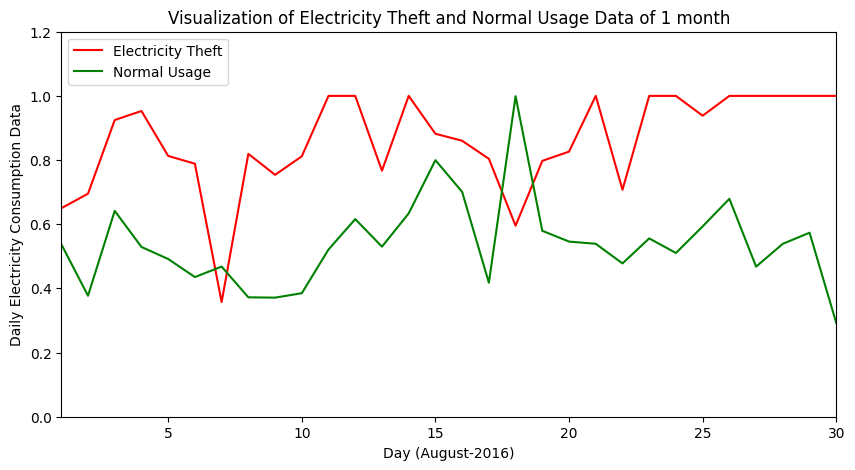

In [ ]:
plt.figure(figsize = (10,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.plot(x,theft_c[900:930],'r',label = 'Electricity Theft', data = None)
plt.plot(x,normal_c[900:930],'g', label = 'Normal Usage',data = None)
plt.legend(loc = 'upper left')
plt.xlim(right=30) #xmax is your value
plt.xlim(left=1) #xmin is your value
plt.ylim(top=1.2) #ymax is your value
plt.ylim(bottom=0)

plt.title('Visualization of Electricity Theft and Normal Usage Data of 1 month')
plt.xlabel('Day (August-2016)')
plt.ylabel('Daily Electricity Consumption Data')
#plt.grid(which='major', axis='both' )
#plt.savefig('Pic.jpeg')
plt.savefig('/mydrive/Fig2_One_month_visual.png', dpi = 2000)
plt.show()

In [ ]:
#Save Plot Data in CSV File
d = {'Theft': theft_c[900:930], 'Normal': normal_c[900:930]}
vis_data = pd.DataFrame(data=d)
vis_data.to_csv("/mydrive/Fig2_One_month_visual.csv")

(7,)
(7,)
(7,)


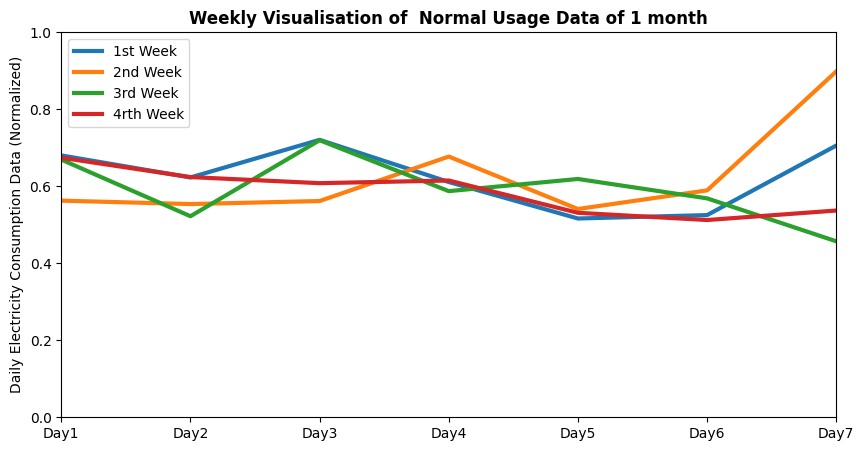

In [ ]:
r = 1000
w1 = normal_c[r:r+7]
w2 = normal_c[r+7:r+14]
w3 = normal_c[r+14:r+21]
w4 = normal_c[r+21:r+28]
print(w1.shape)
print(w2.shape)
print(w3.shape)

x = ['Day1','Day2','Day3','Day4','Day5','Day6','Day7']
plt.figure(figsize = (10,5))
plt.plot(x,w1,label = '1st Week', linewidth=3.0)
plt.plot(x,w2,label = '2nd Week',linewidth=3.0)
plt.plot(x,w3,label = '3rd Week',linewidth=3.0)
plt.plot(x,w4,label = '4rth Week',linewidth=3.0)
plt.axis([0, 6, 0, 1])
plt.legend() #loc = 'upper left'

plt.title('Weekly Visualisation of  Normal Usage Data of 1 month', color = "black", weight = "bold")

plt.ylabel('Daily Electricity Consumption Data (Normalized)',color = "black")
#plt.grid(which='major', axis='both' )
#plt.savefig('Pic.jpeg')
plt.savefig('/mydrive/F3_Weekly_Visual_Normal.png', dpi = 1500)
plt.show()

In [ ]:
#Save in Excel
d = {'Week1': np.array(w1),'Week2': np.array(w2),'Week3': np.array(w3),'Week4': np.array(w4)}
weekly_nor = pd.DataFrame(data=d)
weekly_nor.to_csv("/mydrive/F2_Weekly_visual_Normal.csv")

(7,)
(7,)
(7,)


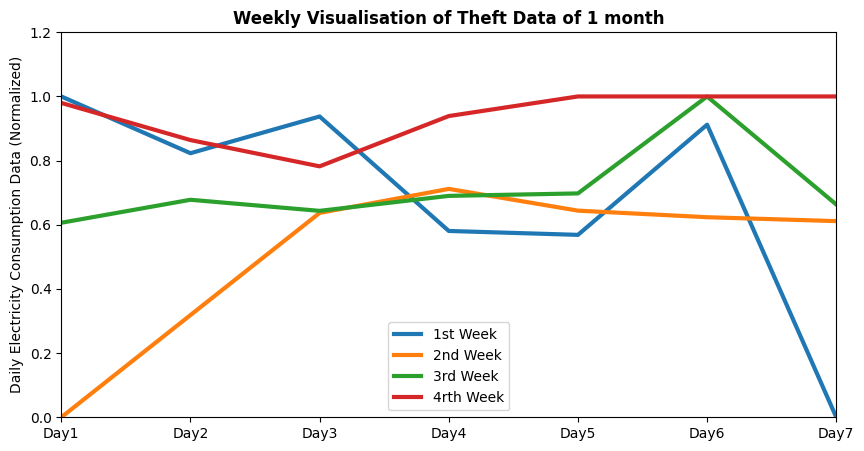

In [ ]:
r = 1005
w1 = theft_c[r:r+7]
w2 = theft_c[r+7:r+14]
w3 = theft_c[r+14:r+21]
w4 = theft_c[r+21:r+28]
print(w1.shape)
print(w2.shape)
print(w3.shape)

x = ['Day1','Day2','Day3','Day4','Day5','Day6','Day7']
plt.figure(figsize = (10,5))
plt.plot(x,w1,label = '1st Week', linewidth=3.0)
plt.plot(x,w2,label = '2nd Week',linewidth=3.0)
plt.plot(x,w3,label = '3rd Week',linewidth=3.0)
plt.plot(x,w4,label = '4rth Week',linewidth=3.0)
plt.axis([0, 6, 0, 1.2])
plt.legend() #loc = 'upper left'

plt.title('Weekly Visualisation of Theft Data of 1 month', color = "black", weight = "bold")

plt.ylabel('Daily Electricity Consumption Data (Normalized)',color = "black")
#plt.grid(which='major', axis='both' )
#plt.savefig('Pic.jpeg')
plt.savefig('/mydrive/F3_Weekly_Visual_Theft.png', dpi = 1500)
plt.show()

In [ ]:
#Save in Excel
d = {'Week1': np.array(w1),'Week2': np.array(w2),'Week3': np.array(w3),'Week4': np.array(w4)}
weekly_theft = pd.DataFrame(data=d)
weekly_theft.to_csv("/mydrive/F2_Weekly_visual_theft.csv")

In [ ]:

x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20) #random_state=42

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 1034)
(27072,)
(6769, 1034)
(6769,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],94,11)
x_test = x_test.reshape(x_test.shape[0],94,11)
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#y_train = y_train.reshape(y_train.shape[0],1)
#y_test = y_test.reshape(y_test.shape[0],1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 94, 11)
(27072,)
(6769, 94, 11)
(6769,)


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 14.7 MB/s eta 0:00:00


In [ ]:

import tensorflow as tf
import keras_tuner
from tensorflow import keras

In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=112, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(94,11)
    ),
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=80, max_value=110, step=10),
        activation='tanh'
    ),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=50, max_value=100, step=10),
        activation='tanh'
    ),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
              loss='binary_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-29-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
tuner=keras_tuner.RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Elec theft cnn")

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test,y_test))


Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.912542462348938

Best val_accuracy So Far: 0.912542462348938
Total elapsed time: 00h 02m 06s


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

from keras.optimizers import Adam


In [ ]:
#n_steps,n_features = 50,1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(94,11)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(80, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs=36, validation_data=(x_test, y_test), initial_epoch=3)

Epoch 4/36
846/846 [==============================] - 6s 5ms/step - loss: 0.3310 - accuracy: 0.8920 - val_loss: 0.3059 - val_accuracy: 0.8967
Epoch 5/36
846/846 [==============================] - 4s 5ms/step - loss: 0.3101 - accuracy: 0.8942 - val_loss: 0.3041 - val_accuracy: 0.8984
Epoch 6/36
846/846 [==============================] - 6s 7ms/step - loss: 0.2955 - accuracy: 0.8972 - val_loss: 0.2898 - val_accuracy: 0.9022
Epoch 7/36
846/846 [==============================] - 4s 4ms/step - loss: 0.2802 - accuracy: 0.9024 - val_loss: 0.2825 - val_accuracy: 0.9016
Epoch 8/36
846/846 [==============================] - 4s 4ms/step - loss: 0.2696 - accuracy: 0.9041 - val_loss: 0.2827 - val_accuracy: 0.9035
Epoch 9/36
846/846 [==============================] - 4s 5ms/step - loss: 0.2572 - accuracy: 0.9098 - val_loss: 0.2841 - val_accuracy: 0.9034
Epoch 10/36
846/846 [==============================] - 5s 6ms/step - loss: 0.2476 - accuracy: 0.9119 - val_loss: 0.2731 - val_accuracy: 0.9087
Epoch

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 92, 64)            2176      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 46, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 44, 32)            6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 22, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 704)               0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [ ]:
model.save('CNN_Theft.h5')

In [ ]:

!cp 'CNN_Theft.h5' '/mydrive/cnn_theft.h5'

In [ ]:
from keras.models import load_model
model = load_model('/mydrive/cnn_theft.h5')



In [ ]:
# evaluate the model


_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.972, Test: 0.912


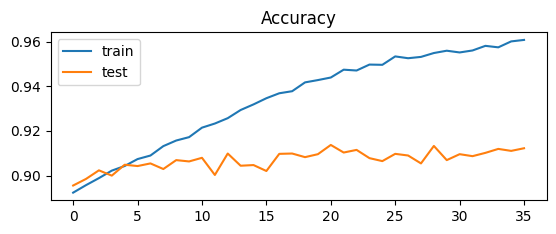

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred = model.predict(x_test)
#probability Prediction

212/212 [==============================] - 1s 3ms/step


In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

y_pred

212/212 [==============================] - 1s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
count=0
for i in y_pred:
  if (i!=0):
    count=count+1
print('predicted 1 : ',count)

count=0
for i in y_test:
  if (i!=0):
    count=count+1
print('actual 1 : ',count)

predicted 1 :  474
actual 1 :  702


In [ ]:
len(y_pred)

6769

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9122470084207416

In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)
print('No of correctly classify sample ',count, ' out of ',len(y_test))

No of correctly classify sample  6175  out of  6769


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6067
           1       0.61      0.41      0.49       702

    accuracy                           0.91      6769
   macro avg       0.77      0.69      0.72      6769
weighted avg       0.90      0.91      0.90      6769



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5884  183]
 [ 411  291]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


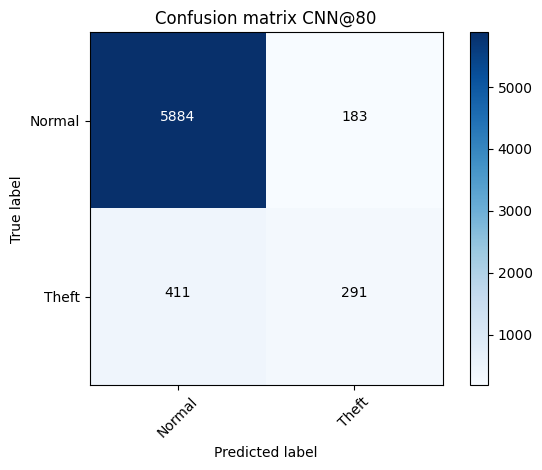

In [ ]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Normal', 'Theft'],title='Confusion matrix CNN@80')

212/212 [==============================] - 2s 11ms/step


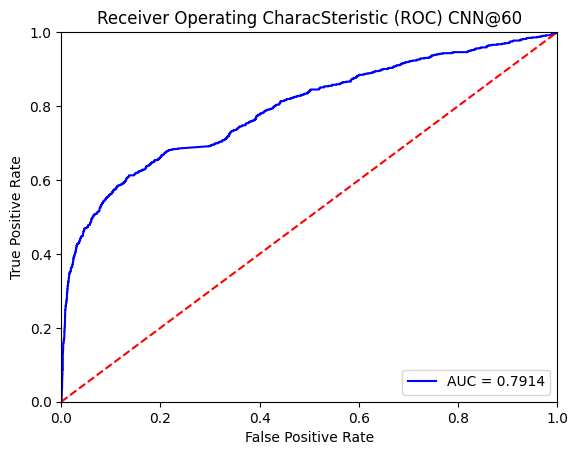

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict(x_test)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating CharacSteristic (ROC) CNN@60')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(model)

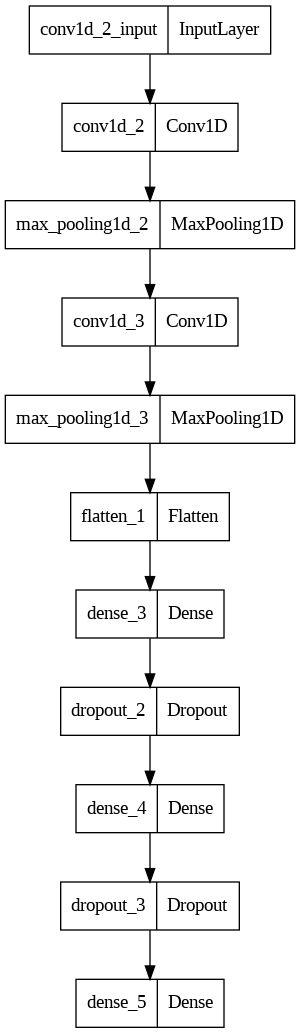

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)
